# Web Scraping in Python
* As a Data Scientist and Machine Learning Engineer, you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before you can do so, however, you will need to know how to get data into Python.
* In the prequel to this lesson, you learned many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, images etc.
* In this lesson, you'll extend this knowledge base by learning to import data from the web.The web is a rich source of data from which you can extract various types of insights and findings. In this lesson, you will learn how to get data from the web, whether it is stored in files or in HTML. You'll also learn the basics of scraping and parsing web data.
* What you need is not access to that information, but a scalable way to collect, organize, and analyze it.
* **Web scraping automatically extracts data and presents it in a format you can easily make sense of.**

### Importing Files from the Web
* You can: go to URL and click to download files
* BUT: 
   + not reproducible : because not written in code and if someone want to reproduce your workflow, she/he necessarily have to do so outside Python.
   + not scalable : If you wanted to download one hundred or one thousand such files, it would take one hundred or one thousand times as long, whereas if you wrote it in code, your workflow could scale.
* There are number of great packages to help us import web data e.g:
   + urllib
   + requests


###### urllib
* Provides high-level interface for fetching data across the world wide web
* <code>urlopen()</code> - accepts Universeal Resource allocators(URLs) instead of file names, similar to built-in <code>open</code> function

In [1]:
import urllib
print(dir(urllib))
help(urllib)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'error', 'parse', 'request', 'response']
Help on package urllib:

NAME
    urllib

PACKAGE CONTENTS
    error
    parse
    request
    response
    robotparser

FILE
    c:\users\adan1145\anaconda3\lib\urllib\__init__.py




In [2]:
import urllib.request
print(dir(urllib.request))
help(urllib.request)

['AbstractBasicAuthHandler', 'AbstractDigestAuthHandler', 'AbstractHTTPHandler', 'BaseHandler', 'CacheFTPHandler', 'ContentTooShortError', 'DataHandler', 'FTPHandler', 'FancyURLopener', 'FileHandler', 'HTTPBasicAuthHandler', 'HTTPCookieProcessor', 'HTTPDefaultErrorHandler', 'HTTPDigestAuthHandler', 'HTTPError', 'HTTPErrorProcessor', 'HTTPHandler', 'HTTPPasswordMgr', 'HTTPPasswordMgrWithDefaultRealm', 'HTTPPasswordMgrWithPriorAuth', 'HTTPRedirectHandler', 'HTTPSHandler', 'MAXFTPCACHE', 'OpenerDirector', 'ProxyBasicAuthHandler', 'ProxyDigestAuthHandler', 'ProxyHandler', 'Request', 'URLError', 'URLopener', 'UnknownHandler', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', '_cut_port_re', '_ftperrors', '_have_ssl', '_localhost', '_noheaders', '_opener', '_parse_proxy', '_proxy_bypass_macosx_sysconf', '_randombytes', '_safe_gethostbyname', '_thishost', '_url_tempfiles', 'addclosehook', 'addinfourl', 'base64',

In [3]:
# Writing contents of the url to a file 'forestfires.csv' using urlretrieve
from urllib.request import urlretrieve
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

urlretrieve(url, 'forestfires.csv')    

('forestfires.csv', <http.client.HTTPMessage at 0x1a40eb39da0>)

**Check your Jupyter Homepage to locate file in your opened directory**

In [4]:
# Loading the locally stored file using pandas
import pandas as pd
df = pd.read_csv('forestfires.csv', sep = ';')
print(df.head())

  X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0      7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0  
1      7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0  
2    7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0  
3        8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0  
4    8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0  


In [5]:
import csv

with open("forestfires.csv") as f:
    cof = csv.reader(f)
    ppp = [l for l in cof]
    
print(ppp[0:5])

[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], ['7', '5', 'mar', 'fri', '86.2', '26.2', '94.3', '5.1', '8.2', '51', '6.7', '0', '0'], ['7', '4', 'oct', 'tue', '90.6', '35.4', '669.1', '6.7', '18', '33', '0.9', '0', '0'], ['7', '4', 'oct', 'sat', '90.6', '43.7', '686.9', '6.7', '14.6', '33', '1.3', '0', '0'], ['8', '6', 'mar', 'fri', '91.7', '33.3', '77.5', '9', '8.3', '97', '4', '0.2', '0']]


In [6]:
# Loading file directly from the url using pandas
import pandas as pd
df = pd.read_csv(url, sep = ';')
print(df.head())

  X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0      7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0  
1      7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0  
2    7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0  
3        8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0  
4    8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0  


In [7]:
with open('cleveland.data',"r") as f:
    print(f.readlines())

['18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"\n', '15.0   8   350.0      165.0      3693.      11.5   70  1\t"buick skylark 320"\n', '18.0   8   318.0      150.0      3436.      11.0   70  1\t"plymouth satellite"\n', '16.0   8   304.0      150.0      3433.      12.0   70  1\t"amc rebel sst"\n', '17.0   8   302.0      140.0      3449.      10.5   70  1\t"ford torino"\n', '15.0   8   429.0      198.0      4341.      10.0   70  1\t"ford galaxie 500"\n', '14.0   8   454.0      220.0      4354.       9.0   70  1\t"chevrolet impala"\n', '14.0   8   440.0      215.0      4312.       8.5   70  1\t"plymouth fury iii"\n', '14.0   8   455.0      225.0      4425.      10.0   70  1\t"pontiac catalina"\n', '15.0   8   390.0      190.0      3850.       8.5   70  1\t"amc ambassador dpl"\n', '15.0   8   383.0      170.0      3563.      10.0   70  1\t"dodge challenger se"\n', '14.0   8   340.0      160.0      3609.       8.0   70  1\t"plymouth \'cuda 340"\n', '1

In [8]:
import pandas as pd
df = pd.read_csv('cleveland.data', header = None)
print(df.head())

                                                   0
0  18.0   8   307.0      130.0      3504.      12...
1  15.0   8   350.0      165.0      3693.      11...
2  18.0   8   318.0      150.0      3436.      11...
3  16.0   8   304.0      150.0      3433.      12...
4  17.0   8   302.0      140.0      3449.      10...


### HTTP Requests to Import websites from the web
* URL : References to web resources
* Web addresses(Locations of Websites)
* Ingredients:
  + Protocol identifier - http/https
  + Resource name - piaic.org
* These combination of protocol id and resource name uniquely specifies the web address

* **HTTP** - [HyperText Transfer Protocol](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol)
  + The Hypertext Transfer Protocol (HTTP) is an application protocol for distributed, collaborative, hypermedia information systems.
  + Foundation of data communication for the web
  + HTTPS - more secure form of HTTP
  + Each time Going to a website, you are actually sending HTTP request to a server. This request is known as:
    + GET request( Most common type of HTTP Request )
  + <code>urlretrieve()</code> performs a GET request and saves the data locally

* **HTML** - HyperText Markup Language: Standard [Markup Language](https://techterms.com/definition/markup_language) for the web.
  +  but HTML is Mix of unstructured and structured data - Most of it is unstructured text as we will see by print command
  + Structured data:
    + Has pre-defined data model, or
    + organized in a defined manner
  + unstructured data: neither of these properties
  + It does contain tags that determine, for example, where headings and hyperlinks can be found
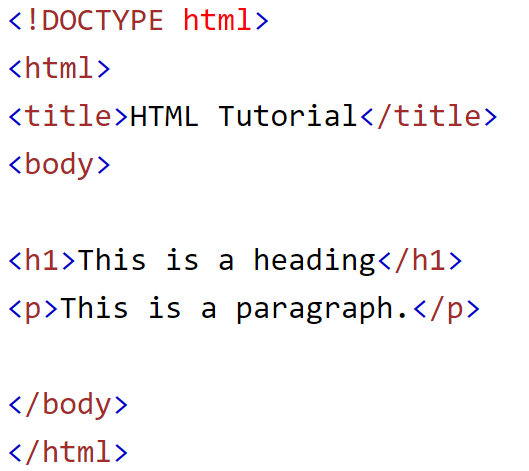

Also, HTML tags sometimes come with id or class attributes. The id attribute specifies a unique id for an HTML tag and the value must be unique within the HTML document. The class attribute is used to define equal styles for HTML tags with the same class. We can make use of these ids and classes to help us locate the data we want.

**Getting HTML Data from a webpage**

**1) GET requests using urllib**


In [55]:
from urllib.request import urlopen, Request
#help(urlopen)
#help(Request)

url = "https://www.wikipedia.org/"
request = Request(url)     # Packaging the GET request using the function Request
response = urlopen(request)# Send the request and catch the response using the function urlopen. This returns HTTPResponse object

html = response.read()  # which has an associated read method which returns the HTML as a string and we it stored as variable html
response.close()        # Closing the response!

print(type(response))
print(html)


<class 'http.client.HTTPResponse'>
b'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<![if gt IE 7]>\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<![endif]>\n<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no"><![endif]-->\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-81a290a5.png);background-image:linear-gradient(transparent,transparent),url(portal/

**2) GET requests using requests**
* Higher-level Requests package provides Wonderful API for making requests
* Requests allows you to send organic, grass-fed HTTP requests without the need for manual labor
* Used by “her Majesty's Government, Amazon, Google, Twilio, NPR, Obama for America, Twitter, Sony, and Federal U.S. Institutions that prefer to be unnamed”
* One of the most downloaded Pyhton packages (7 Million downloads every month)

In [53]:
import requests
url = "https://www.wikipedia.org/"
r = requests.get(url) # Package the request, send the request and catch the response with single function
text = r.text # .text returns html as a string 

print(text)

<!DOCTYPE html>
<html lang="mul" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<![if gt IE 7]>
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<![endif]>
<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no"><![endif]-->
<meta name="viewport" content="initial-scale=1,user-scalable=yes">
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">
<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">
<style>
.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-81a290a5.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-81a290a5.svg);background

**Note that unlike in urllib, we don't have to close the connection when using requests!. Moreover, requests provided higher-level interface, fewer lines of code was required to retrieve the relevant HTML as a string**

### Scrapping the web in python

**[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)**
* Getting Started - <code>pip install BeautifulSoup4</code>
* To turn HTML into a useful data, we will need to parse it and extract structured data from it
* Term _tag soup_ is used for structurally and syntactically incorrect HTML code written for a web page 
* **Beautiful Soup** Make *tag soup* beautiful again and extract information from it with ease

In [4]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)    #Creating beautifulsoup object from the html_doc
print(soup)
#soup.prettify()

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [61]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

**Exploring BeautifulSoup**

In [82]:
print(soup.title)   # Extracting title of the webapge
print(type(soup.title))
soup.title.string

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<class 'bs4.element.Tag'>


'Beautiful Soup: We called him Tortoise because he taught us.'

In [78]:
print(soup.get_text())    # Extracting all the text on the webpage




Beautiful Soup: We called him Tortoise because he taught us.








#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}


[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beauti

**find_all() method for repetitive tags**
* [w3schools, a website with lots of great info. on HTML file structure](https://www.w3schools.com/)
   + [The \\<a\\> tag](https://www.w3schools.com/tags/tag_a.asp)
   + [The \\<tr\\> tag](https://www.w3schools.com/tags/tag_tr.asp)
   + [The \\<td\\> tag](https://www.w3schools.com/tags/tag_td.asp)

Also, HTML tags sometimes come with id or class attributes. The id attribute specifies a unique id for an HTML tag and the value must be unique within the HTML document.

In [80]:
# Extracting the URLs of the hyperlinks on the webpage using find_all method
# Remember that hyperlinks are defined by the HTML tag <a> in HTML
# <a> passed to find_all() without angle brackets
a_tags = soup.find_all('a')
print(a_tags[0:4])

for link in a_tags:   
    print(link.get('href'))        #printing hyperlinks in each tag

[<a href="#Download">Download</a>, <a href="bs4/doc/">Documentation</a>, <a href="#HallOfFame">Hall of Fame</a>, <a href="enterprise.html">For enterprise</a>]
#Download
bs4/doc/
#HallOfFame
enterprise.html
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
bs4/download/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.2.ta

In [ ]:
tag.text.strip()
soup.find()

* **These are merely a few of many methods existing in _Beautiful Soup_ to extract data from html.**
* There are plenty of great resources on their website to learn those

###### Task 1:
* Parse, prettify and extract information from the given urls of novels using beautifulsoup and request packages:  
   + [The Adventures of Sherlock Holmes](https://www.gutenberg.org/files/1661/1661-h/1661-h.htm) 
   + [Robinson Crusoe](https://www.gutenberg.org/files/521/521-h/521-h.htm)
   + [A Tale of Two Cities](https://www.gutenberg.org/files/98/98-h/98-h.htm)

In [87]:
# import the required libraries first
def web_scrapper (url):
    
    

* **You learnt to scrape from the website Project Gutenberg (large corpus of books) using the Python package requests and how to extract the novels from this web data using BeautifulSoup.**
* After extraction, this text now can be used for example in any NLP Project to tokenize, remove stop words and find the most frequent words

**Scraping Rules**

1) You should check a website’s Terms and Conditions before you scrape it. Be careful to read the statements about legal use of data. Usually, the data you scrape should not be used for commercial purposes.

2) Do not request data from the website too aggressively with your program (also known as spamming), as this may break the website. Make sure your program behaves in a reasonable manner (i.e. acts like a human). One request for one webpage per second is good practice.

3) The layout of a website may change from time to time, so make sure to revisit the site and rewrite your code as needed

# What's next ?
* [Beautifulsoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Web Scraping with Python in SCRAPY(Datacamp Course)](https://www.datacamp.com/courses/web-scraping-with-python)
* [BeautifulSoup by Sentdex(Youtube)](https://www.youtube.com/user/sentdex/search?query=beautifulsoup)
* [Web Scrapping with Python- Youtube](https://www.youtube.com/results?search_query=web+scraping+with+python&sp=CAM%253D)
* [BeautifulSoup - Youtube](https://www.youtube.com/results?search_query=beautifulsoup&sp=CAM%253D)
* [30 minute Python Scrapper using Selenium](https://hackernoon.com/30-minute-python-web-scraper-39d6d038e5da)
* [Using Scrappy to build your own Dataset](https://towardsdatascience.com/using-scrapy-to-build-your-own-dataset-64ea2d7d4673)
* [Scraping Websites with Python and BeautifulSoup](https://www.freecodecamp.org/news/how-to-scrape-websites-with-python-and-beautifulsoup-5946935d93fe/)
* [Web Scraping 101 Python](http://www.gregreda.com/2013/03/03/web-scraping-101-with-python/)
* [Beginner Guide of Web Wcraping in Pyhton(Beautiful Soup)](https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/)

In [ ]:
# Solution Task 1
# import the required libraries first

from bs4 import BeautifulSoup
import requests

def web_scrapper(url):
    """Takes a url (from Project Gutenberg) and prints the title, text and hyperlinks present in the novel"""

    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)    #Creating beautifulsoup object from the html_doc
    #print(html_doc)
    #print(soup.prettify())
    print(soup.title.string)
    print(soup.get_text()) 
    a_tags = soup.find_all('a')
    for link in a_tags:   
        print(link.get('href')) 

In [ ]:
web_scrapper('https://www.gutenberg.org/files/1661/1661-h/1661-h.htm')

In [ ]:
web_scrapper('https://www.gutenberg.org/files/521/521-h/521-h.htm')

In [ ]:
web_scrapper('https://www.gutenberg.org/files/98/98-h/98-h.htm')